In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
path = os.path.join("CausalHans", "tmp_data", "sce_causalhans.pkl")
df = pd.read_pickle(path)

display(df.head())

A          F          H         M
0  49.367962  26.840108   8.837514  4.865344
1  59.150369  30.131319   2.362158 -1.113001
2  79.751955  38.131366  13.248059  5.238734
3  59.521502  28.982223   7.883255  4.141607
4  71.070921  37.263800   3.899191 -0.418791

Der ausgewählte Index ist: 64
Der ausgewählte Index für das 25. Perzentil ist: 431


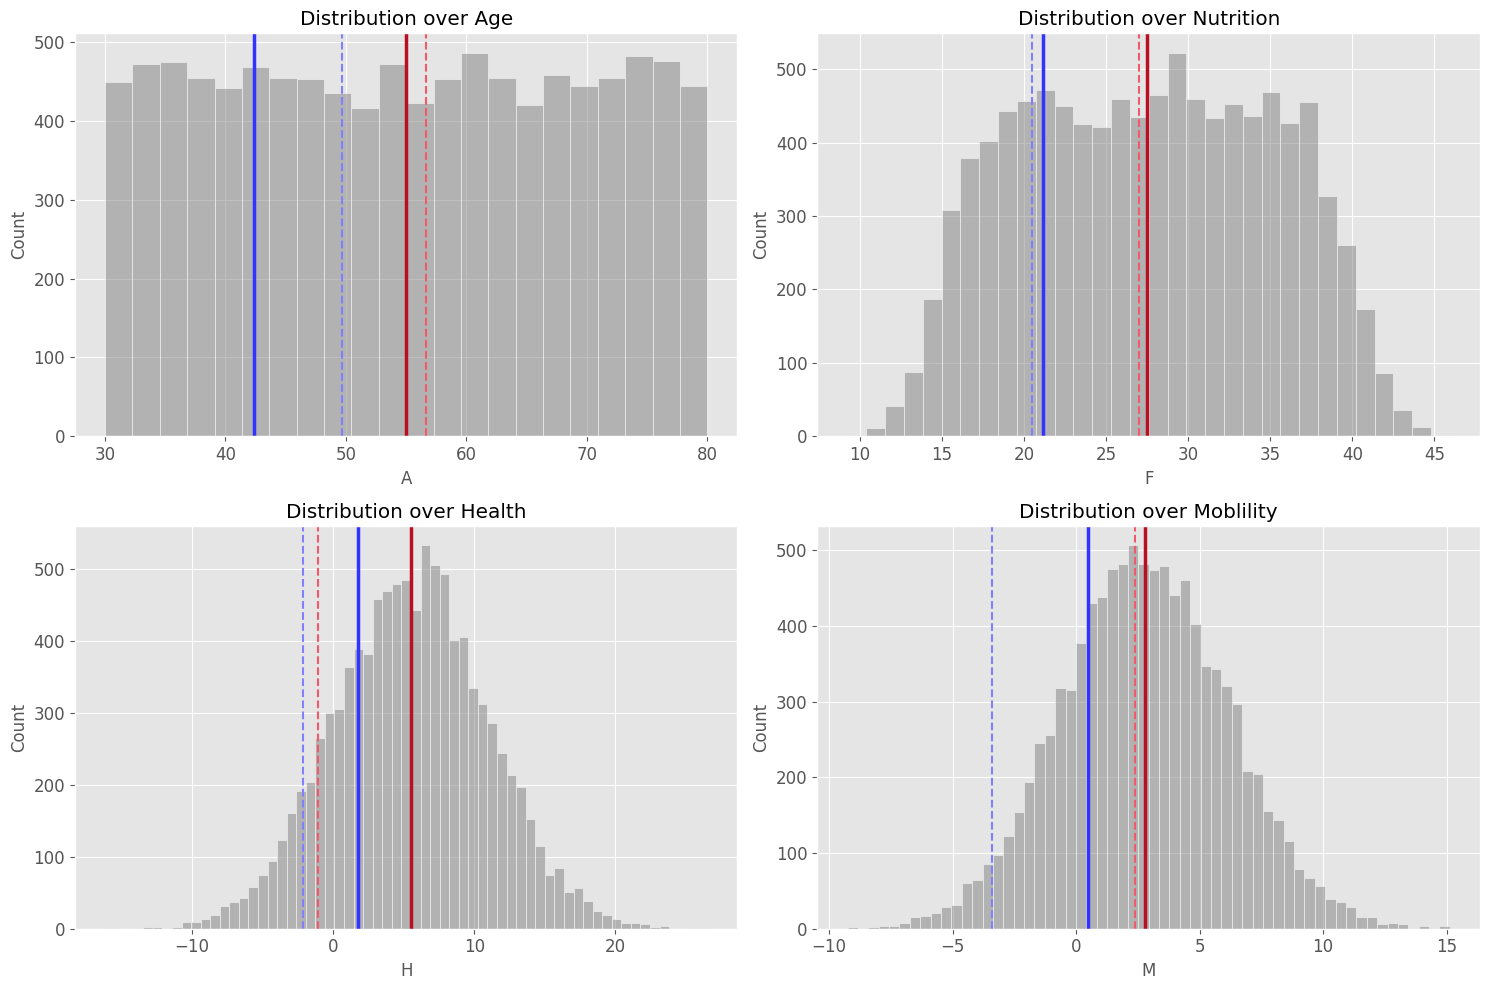

In [5]:
import matplotlib.patches as mpatches
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ggplot Stil verwenden
plt.style.use('ggplot')


# Durchschnittswerte berechnen
mean_A = df['A'].mean()
mean_F = df['F'].mean()
mean_H = df['H'].mean()
mean_M = df['M'].mean()

# 25. Perzentil berechnen
perc_25_A = np.percentile(df['A'], 25)
perc_25_F = np.percentile(df['F'], 25)
perc_25_H = np.percentile(df['H'], 25)
perc_25_M = np.percentile(df['M'], 25)

# Bedingungen anwenden
condition = (df['A'] > mean_A) & (df['F'] < mean_F) & (df['H'] < mean_H) & (df['M'] < mean_M)
selected_index = df[condition].first_valid_index()

# Bedingungen für das 25. Perzentil anwenden
condition_25 = (df['A'] > perc_25_A) & (df['F'] < perc_25_F) & (df['H'] < perc_25_H) & (df['M'] < perc_25_M)
selected_index_25 = df[condition_25].index 

selected_index_25 = selected_index_25[1] # Test the second valid index for the 25 percentile condition

print(f"Der ausgewählte Index ist: {selected_index}")
print(f"Der ausgewählte Index für das 25. Perzentil ist: {selected_index_25}")

fig, axs = plt.subplots(2, 2, figsize=(15, 10))


# Für alle Diagramme
for ax in axs.flat:
    ax.tick_params(axis='x', labelsize=12) # Größe der X-Achsenbeschriftung
    ax.tick_params(axis='y', labelsize=12) # Größe der Y-Achsenbeschriftung


# Variables for easy styling
mean_color = '#B90F22'
perc_25_color = '#3333ff'
selected_index_color = '#f25a6c'
selected_index_25_color = '#8080ff'

mapping = {"H":"Health", "A":"Age", "F":"Nutrition", "M":"Moblility"}

# Histograms and vertical lines
for i, (variable, mean, perc_25) in enumerate(zip(['A', 'F', 'H', 'M'], [mean_A, mean_F, mean_H, mean_M], [perc_25_A, perc_25_F, perc_25_H, perc_25_M])):
    sns.histplot(df[variable], ax=axs[i//2, i%2], color='grey', alpha=0.5)
    axs[i//2, i%2].axvline(mean, color=mean_color, linewidth=2.5)
    axs[i//2, i%2].axvline(perc_25, color=perc_25_color, linewidth=2.5)
    axs[i//2, i%2].set_title(f'Distribution over {mapping[variable]}')
    axs[i//2, i%2].axvline(df[variable].loc[selected_index], color=selected_index_color, linestyle='--', linewidth=1.5)
    axs[i//2, i%2].axvline(df[variable].loc[selected_index_25], color=selected_index_25_color, linestyle='--', linewidth=1.5)

# Legend
mean_patch = mpatches.Patch(color=mean_color, label='Mean')
perc_25_patch = mpatches.Patch(color=perc_25_color, label='25% Percentile')
selected_index_patch = mpatches.Patch(color=selected_index_color, label=f'Patient ID: {selected_index}')
selected_index_25_patch = mpatches.Patch(color=selected_index_25_color, label=f'Patient ID: {selected_index_25}')
#legend = plt.legend(handles=[mean_patch, perc_25_patch, selected_index_patch, selected_index_25_patch], loc='upper right', bbox_to_anchor=(1.3, 1.05), prop={'size': 12})

plt.tight_layout()
plt.savefig("plot.svg", format="svg",  bbox_inches='tight')

# # Save individual plots as SVG files
# for i, variable in enumerate(['A', 'F', 'H', 'M']):
#     fig, ax = plt.subplots(figsize=(8, 6))
#     sns.histplot(df[variable], ax=ax, color='grey', alpha=0.5)
#     ax.axvline(df[variable].mean(), color=mean_color, linewidth=2.5)
#     ax.axvline(np.percentile(df[variable], 25), color=perc_25_color, linewidth=2.5)
#     ax.axvline(df[variable].loc[selected_index], color=selected_index_color, linestyle='--', linewidth=1.5)
#     ax.axvline(df[variable].loc[selected_index_25], color=selected_index_25_color, linestyle='--', linewidth=1.5)
#     ax.set_title(f'Distribution over {mapping[variable]}')
#     legend = ax.legend(handles=[mean_patch, perc_25_patch, selected_index_patch, selected_index_25_patch], loc='upper right', bbox_to_anchor=(1.3, 1.05), prop={'size': 12})
#     plt.tight_layout()
#     plt.savefig(f"plot_{variable}.svg", format="svg", bbox_inches='tight')



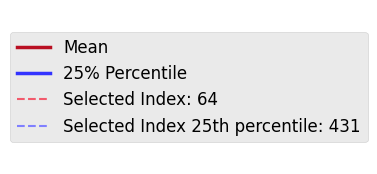

In [6]:
from matplotlib.lines import Line2D

# Create a figure for the legend
fig_legend, ax_legend = plt.subplots(figsize=(3, 2))

# Legende erstellen
mean_line = Line2D([0], [0], color='#B90F22', linewidth=2.5, label='Mean')
perc_25_line = Line2D([0], [0], color='#3333ff', linewidth=2.5, label='25% Percentile')
selected_line = Line2D([0], [0], color='#f25a6c', linestyle='--', linewidth=1.5, label=f'Selected Index: {selected_index}')
selected_25_line = Line2D([0], [0], color='#8080ff', linestyle='--', linewidth=1.5, label=f'Selected Index 25th percentile: {selected_index_25}')


# Create legend
legend = ax_legend.legend(handles=[mean_line, perc_25_line, selected_line, selected_25_line],
                          loc='center', prop={'size': 12})
ax_legend.axis('off')

# Save the legend as a separate SVG file
fig_legend.savefig('legend.svg', format='svg', bbox_extra_artists=(legend,), bbox_inches='tight')
plt.show()